In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [361]:
df = pd.read_csv('invoice_train.csv',low_memory=False)

In [362]:
df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [364]:
df.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [365]:
df.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              12
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

In [366]:
df.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [367]:
test = pd.read_csv('invoice_test.csv')

In [368]:
test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [369]:
len(test.columns), len(df.columns) , len(df), len(test)

(16, 16, 4476749, 1939730)

In [370]:
ctrain = pd.read_csv('client_train.csv')

In [371]:
ctrain.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [372]:
ctest = pd.read_csv('client_test.csv')

In [373]:
ctest.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [374]:
len(ctrain), len(ctest)

(135493, 58069)

In [375]:
submission = pd.read_csv('SampleSubmission.csv')

In [376]:
submission.head()

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


In [377]:
ctrain.isna().sum().value_counts()

0    6
dtype: int64

In [378]:
ctrain.target.value_counts()

0.0    127927
1.0      7566
Name: target, dtype: int64

In [379]:
dsa = str(round((ctrain.target.value_counts()[1]/ctrain.target.value_counts()[0]*100),2))
dsb = str(100 - round((ctrain.target.value_counts()[1]/ctrain.target.value_counts()[0]*100),2))
print(f"1: {dsa}"+"%")
print(f"0: {dsb}"+"%")

1: 5.91%
0: 94.09%


# EDA

In [380]:
ctrain.disrict.nunique()

4

In [381]:
sns.set()

<AxesSubplot:xlabel='disrict', ylabel='count'>

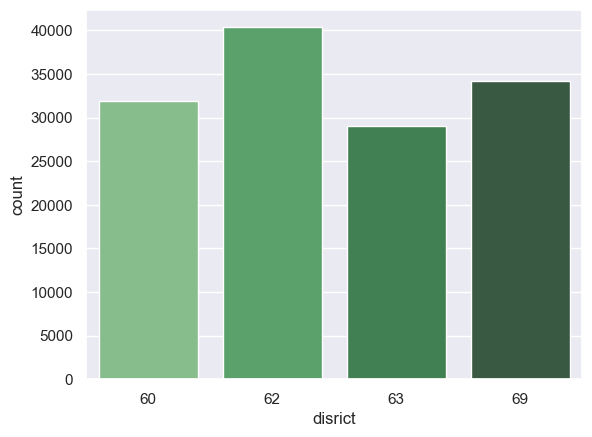

In [382]:
sns.countplot(x="disrict",
data=ctrain,
palette="Greens_d")

In [383]:
ctrain['client_catg'].nunique()

3

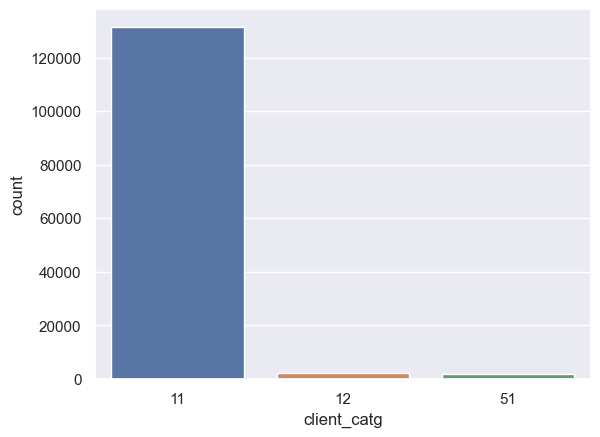

In [384]:
sns.countplot(x="client_catg",
data=ctrain);

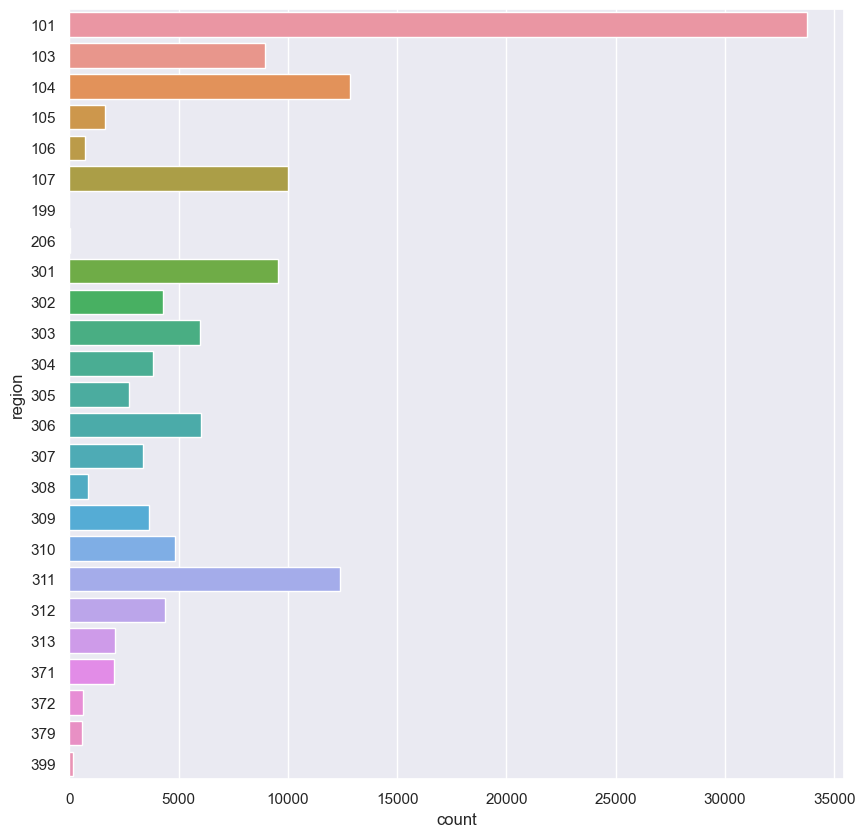

In [385]:
fig ,axis = plt.subplots(figsize=(10,10))
sns.countplot(y='region',data=ctrain);

In [386]:
ctrain.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object')

In [387]:
ctrain['creation_date'].nunique()

8088

In [388]:
ctrain['creation_date'].describe()

count         135493
unique          8088
top       20/11/1997
freq             214
Name: creation_date, dtype: object

In [389]:
ctrain['creation_date'].min(), ctrain['creation_date'].max(), ctrain['creation_date'].mode()

('01/01/1997',
 '31/12/2018',
 0    20/11/1997
 Name: creation_date, dtype: object)

In [390]:
# sns.stripplot(x="creation_date", #Scatterplot with one
# y="target",# categorical variable
# data=ctrain);

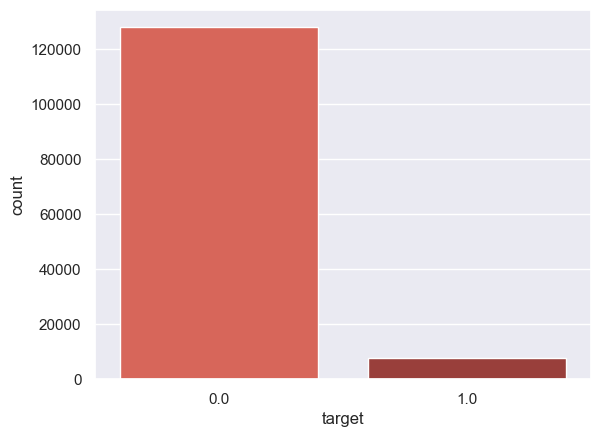

In [391]:
sns.countplot(x="target",# Show count of observations
data=ctrain,
palette="Reds_d");

In [392]:
df.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              12
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

In [393]:
ctrain['client_catg'].nunique()

3

In [394]:
ctrain.client_catg.value_counts()/ctrain.client_catg.value_counts().sum()*100

11    97.048556
12     1.713004
51     1.238440
Name: client_catg, dtype: float64

In [395]:
(ctrain.client_catg.value_counts())
s = ctrain.client_catg.value_counts().sum()
print(f"11  :{round(131494/s,2)*100}%")
print(f"12  :{round(2321/s,2)*100}%")
print(f"51  :{round(1678/s,2)*100}%")

11  :97.0%
12  :2.0%
51  :1.0%


In [396]:
ctrain['disrict'].nunique()

4

In [397]:
ctrain['disrict'].value_counts()

62    40353
69    34231
60    31922
63    28987
Name: disrict, dtype: int64

In [398]:
ctrain.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object')

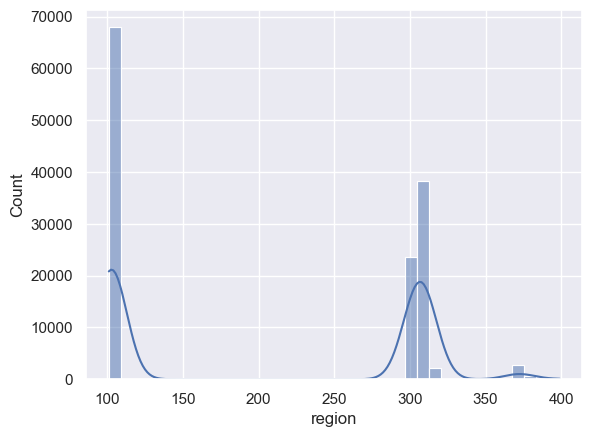

In [399]:
sns.histplot(data=ctrain, x="region", kde=True);
# sns.histplot(data=ctrain, x="region", log_scale=True)

# 2 EDA  DF

In [400]:
df.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [401]:
df['invoice_date'].min(), df['invoice_date'].max(), df['invoice_date'].mode()

('1977-06-09',
 '2019-12-07',
 0    2019-03-09
 Name: invoice_date, dtype: object)

In [402]:
df['invoice_date'].describe()

count        4476749
unique          8275
top       2019-03-09
freq            4127
Name: invoice_date, dtype: object

## Tax

In [403]:
df['tarif_type'].value_counts()

11    2679872
40    1379755
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
42          1
27          1
Name: tarif_type, dtype: int64

<AxesSubplot:xlabel='tarif_type', ylabel='count'>

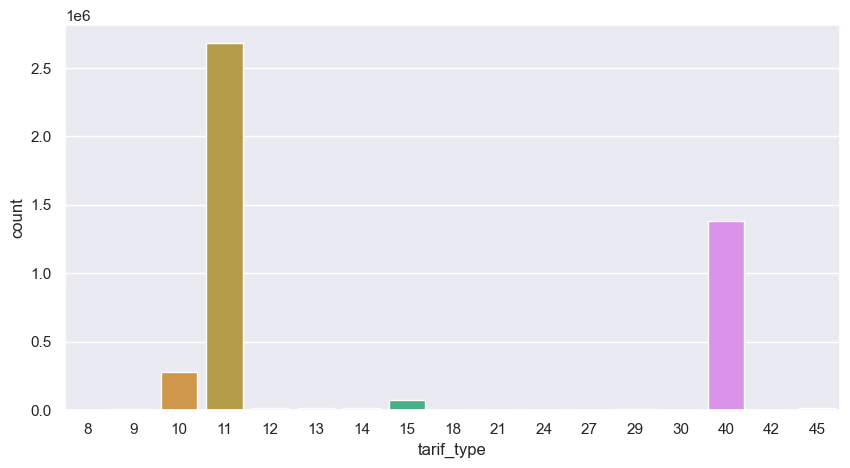

In [404]:
fig ,axis = plt.subplots(figsize=(10,5))
sns.countplot(x="tarif_type",# Show count of observations
data=df)

##  df['counter_number ']           

In [405]:
df['counter_number'].min(), df['counter_number'].max()

(0, 27981145458733)

In [406]:
df['counter_number'].describe()

count    4.476749e+06
mean     1.230587e+11
std      1.657267e+12
min      0.000000e+00
25%      1.211080e+05
50%      4.945610e+05
75%      1.115161e+06
max      2.798115e+13
Name: counter_number, dtype: float64

# Errore Here

In [407]:
print(f"Number of Row with counter equal One")
df[df['counter_number']==1]['counter_number'].count()

Number of Row with counter equal One


23

In [408]:
print(f"Number of Row is Greater than One")
df[df['counter_number']>1]['counter_number'].count()

Number of Row is Greater than One


4433565

In [409]:
# # fig ,ax = plt.subplots(figsize=(10,5))
# sns.regplot(x="counter_statue", #Plot data and a linear regression
# y="counter_number",# model fit
# data=df,
# ax=ax)

## df['counter status']

In [410]:
df['counter_statue'].describe()

count     4476749
unique         12
top             0
freq      4379008
Name: counter_statue, dtype: object

In [411]:
df['counter_statue'].min(), df['counter_statue'].max()

('0', 'A')

In [412]:
df['counter_statue'].value_counts()

0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

# df['Counter Code']

In [413]:
df['counter_code'].describe()

count    4.476749e+06
mean     1.724884e+02
std      1.338871e+02
min      0.000000e+00
25%      5.000000e+00
50%      2.030000e+02
75%      2.070000e+02
max      6.000000e+02
Name: counter_code, dtype: float64

In [414]:
df['counter_code'].min(), df['counter_code'].max(), df['counter_code'].mode()

(0,
 600,
 0    203
 Name: counter_code, dtype: int64)

In [415]:
df.counter_code.value_counts().head()

203    1516836
5      1352035
207     555628
413     378917
202     343251
Name: counter_code, dtype: int64

## df['counter_type']

In [416]:
df['counter_type'].value_counts()

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64

# df['months_number']

In [417]:
df['months_number'].min(), df['months_number'].max()

(0, 636624)

# Date

In [418]:
print(f"the Min of 0 Date: {ctrain[ctrain['target']==0]['creation_date'].min()}")
print(f"the Max of 0 Date: {ctrain[ctrain['target']==0]['creation_date'].max()}")

print(f"the Min of 1 Date: {ctrain[ctrain['target']==1]['creation_date'].min()}")
print(f"the Max of 1 Date: {ctrain[ctrain['target']==1]['creation_date'].max()}")

the Min of 0 Date: 01/01/1997
the Max of 0 Date: 31/12/2018
the Min of 1 Date: 01/01/1997
the Max of 1 Date: 31/12/2014


In [419]:
ctrain['creation_date'].describe()

count         135493
unique          8088
top       20/11/1997
freq             214
Name: creation_date, dtype: object

In [420]:
print('Where a Target Equal 1')
ctrain[ctrain['target']==1]['creation_date'].describe()

Where a Target Equal 1


count           7566
unique          3586
top       31/12/2004
freq              23
Name: creation_date, dtype: object

In [421]:
print('Where a Target Equal 0')
ctrain[ctrain['target']==0]['creation_date'].describe()

Where a Target Equal 0


count         127927
unique          8056
top       20/11/1997
freq             199
Name: creation_date, dtype: object

In [422]:
ctrain['creation_date'].value_counts()

20/11/1997    214
31/12/2004    207
28/05/2002    191
20/11/1996    188
31/12/1996    186
             ... 
27/12/2001      1
21/01/1985      1
15/02/1993      1
21/04/1995      1
25/05/1978      1
Name: creation_date, Length: 8088, dtype: int64

In [423]:
ctrain['creation_date'].value_counts().max(), ctrain['creation_date'].value_counts().min(), ctrain['creation_date'].value_counts().mode()

(214,
 1,
 0    1
 Name: creation_date, dtype: int64)

In [424]:
print(f"All Unique Date                     :{ctrain['creation_date'].nunique()}")
print(f"'1' One Date is Frequenced          : {(ctrain['creation_date'].value_counts()==1).sum()}")
print(f"'>1' More than One is  Frequenced   : {(ctrain['creation_date'].value_counts()>1).sum()}")
print(f"'>100' More than 100 is  Frequenced : {(ctrain['creation_date'].value_counts()>100).sum()}")

All Unique Date                     :8088
'1' One Date is Frequenced          : 680
'>1' More than One is  Frequenced   : 7408
'>100' More than 100 is  Frequenced : 39


In [425]:
ctrain['creation_date'].value_counts().describe()

count    8088.000000
mean       16.752349
std        17.464823
min         1.000000
25%         5.000000
50%        12.000000
75%        22.000000
max       214.000000
Name: creation_date, dtype: float64

In [426]:
# ctrain['creation_date'] = pd.to_datetime(ctrain['creation_date'], format='%Y-%m-%d')
ctrain['creation_date'] = pd.to_datetime(ctrain['creation_date'], format='%d/%m/%Y')

In [427]:
ctrain.creation_date.dt.year

0         1994
1         2002
2         1986
3         1996
4         2014
          ... 
135488    2004
135489    2012
135490    2011
135491    1993
135492    1986
Name: creation_date, Length: 135493, dtype: int64

In [428]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y/%m/%d')

In [429]:
df['invoice_date'].dt.month.value_counts()

5     418888
2     417463
4     409188
3     402018
1     380355
6     366846
11    359718
7     354866
8     352748
10    348190
9     336636
12    329833
Name: invoice_date, dtype: int64

In [430]:
df['invoice_date'].dt.day.value_counts()

2     183420
6     178828
5     168919
1     166950
4     164993
9     164261
3     162722
12    160876
10    160624
8     159296
7     157196
16    154812
18    151421
23    149110
11    148550
15    148204
27    147118
24    146253
22    146091
19    145620
17    144442
26    142670
21    139903
28    139381
14    139191
13    138846
25    134648
20    129926
29    111393
30     76003
31     15082
Name: invoice_date, dtype: int64

In [431]:
df['invoice_date'].dt.month.value_counts().sort_values

<bound method Series.sort_values of 5     418888
2     417463
4     409188
3     402018
1     380355
6     366846
11    359718
7     354866
8     352748
10    348190
9     336636
12    329833
Name: invoice_date, dtype: int64>

In [432]:
df['invoice_date'].dt.day.value_counts().sort_values

<bound method Series.sort_values of 2     183420
6     178828
5     168919
1     166950
4     164993
9     164261
3     162722
12    160876
10    160624
8     159296
7     157196
16    154812
18    151421
23    149110
11    148550
15    148204
27    147118
24    146253
22    146091
19    145620
17    144442
26    142670
21    139903
28    139381
14    139191
13    138846
25    134648
20    129926
29    111393
30     76003
31     15082
Name: invoice_date, dtype: int64>

In [433]:
df['invoice_date']

0         2014-03-24
1         2013-03-29
2         2015-03-23
3         2015-07-13
4         2016-11-17
             ...    
4476744   2005-08-19
4476745   2005-12-19
4476746   1996-09-25
4476747   1996-05-28
4476748   1996-01-25
Name: invoice_date, Length: 4476749, dtype: datetime64[ns]

In [434]:
(df['invoice_date'].dt.month).describe()

count    4.476749e+06
mean     6.273786e+00
std      3.432981e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: invoice_date, dtype: float64

In [435]:
df['invoice_date'].dt.month.mode()

0    5
Name: invoice_date, dtype: int64

In [436]:
(df['invoice_date'].dt.month).skew()

0.10226753478914988

In [437]:
len(df[df['client_id']=='train_Client_0'])

35

# DF TEST

In [438]:
dftest = df[df['client_id']=='train_Client_0']

In [439]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   client_id             35 non-null     object        
 1   invoice_date          35 non-null     datetime64[ns]
 2   tarif_type            35 non-null     int64         
 3   counter_number        35 non-null     int64         
 4   counter_statue        35 non-null     object        
 5   counter_code          35 non-null     int64         
 6   reading_remarque      35 non-null     int64         
 7   counter_coefficient   35 non-null     int64         
 8   consommation_level_1  35 non-null     int64         
 9   consommation_level_2  35 non-null     int64         
 10  consommation_level_3  35 non-null     int64         
 11  consommation_level_4  35 non-null     int64         
 12  old_index             35 non-null     int64         
 13  new_index             

In [440]:
# dftest = ctrain[ctrain['client_id']=='train_Client_0']

In [441]:
dftest.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [442]:
ctrain[ctrain['client_id']=='train_Client_0']

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0


# Concatinate the Data se in one data

In [443]:
dftest.nunique()

client_id                1
invoice_date            35
tarif_type               1
counter_number           1
counter_statue           1
counter_code             2
reading_remarque         3
counter_coefficient      1
consommation_level_1    32
consommation_level_2     3
consommation_level_3     1
consommation_level_4     1
old_index               35
new_index               35
months_number            4
counter_type             1
dtype: int64

In [444]:
ctrain[ctrain['target']==1]

,disrict,client_id,client_catg,region,creation_date,target
41,63,train_Client_100032,11,308,2012-11-07,1.0
46,62,train_Client_100037,11,307,2009-09-16,1.0
97,69,train_Client_100083,11,107,1982-10-26,1.0
106,60,train_Client_100091,11,101,2011-02-22,1.0
126,63,train_Client_100109,11,312,1990-12-27,1.0
...,...,...,...,...,...,...
135407,69,train_Client_99921,11,103,2016-05-06,1.0
135435,69,train_Client_99947,12,103,2006-11-17,1.0
135443,62,train_Client_99954,11,310,1987-06-23,1.0
135472,69,train_Client_99980,11,103,2013-06-03,1.0


In [445]:
ctrain[ctrain['target']==0]

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0
1,69,train_Client_1,11,107,2002-05-29,0.0
2,62,train_Client_10,11,301,1986-03-13,0.0
3,69,train_Client_100,11,105,1996-07-11,0.0
4,62,train_Client_1000,11,303,2014-10-14,0.0
...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,2004-07-26,0.0
135489,63,train_Client_99996,11,311,2012-10-25,0.0
135490,63,train_Client_99997,11,311,2011-11-22,0.0
135491,60,train_Client_99998,11,101,1993-12-22,0.0


In [446]:
ctrain[ctrain['client_id']=='train_Client_100032']

,disrict,client_id,client_catg,region,creation_date,target
41,63,train_Client_100032,11,308,2012-11-07,1.0


In [447]:
ctrain[ctrain['client_id']=='train_Client_0']

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0


In [448]:
ctrain[ctrain['target']==0]['creation_date'].min(), ctrain[ctrain['target']==0]['creation_date'].max()

(Timestamp('1977-02-05 00:00:00'), Timestamp('2019-09-10 00:00:00'))

In [449]:
ctrain[ctrain['target']==1]['creation_date'].min(), ctrain[ctrain['target']==1]['creation_date'].max()

(Timestamp('1977-02-05 00:00:00'), Timestamp('2019-05-30 00:00:00'))

In [450]:
ctrain[ctrain['target']==0]['creation_date'].mode(), ctrain[ctrain['target']==1]['creation_date'].mode()

(0   1997-11-20
 Name: creation_date, dtype: datetime64[ns],
 0   2004-12-31
 Name: creation_date, dtype: datetime64[ns])

In [451]:
ctrain[ctrain['creation_date']=='1997-11-20']

,disrict,client_id,client_catg,region,creation_date,target
27,63,train_Client_10002,11,311,1997-11-20,0.0
696,63,train_Client_100622,51,312,1997-11-20,0.0
1287,62,train_Client_101154,11,302,1997-11-20,0.0
1894,62,train_Client_101700,11,304,1997-11-20,0.0
2222,63,train_Client_101997,11,372,1997-11-20,0.0
...,...,...,...,...,...,...
133033,62,train_Client_97785,11,301,1997-11-20,0.0
133607,63,train_Client_98300,11,311,1997-11-20,0.0
134015,63,train_Client_98669,11,311,1997-11-20,0.0
134526,62,train_Client_99128,11,304,1997-11-20,0.0


In [452]:
ctrain[(ctrain['creation_date']=='1997-11-20')& (ctrain['target']==1)]

,disrict,client_id,client_catg,region,creation_date,target
13737,63,train_Client_11236,11,311,1997-11-20,1.0
26580,62,train_Client_123919,11,310,1997-11-20,1.0
32297,62,train_Client_129064,11,304,1997-11-20,1.0
32837,63,train_Client_129550,11,312,1997-11-20,1.0
40704,63,train_Client_14688,11,306,1997-11-20,1.0
51021,63,train_Client_23973,11,311,1997-11-20,1.0
60363,63,train_Client_32380,11,311,1997-11-20,1.0
65013,63,train_Client_36566,11,311,1997-11-20,1.0
70691,63,train_Client_41676,51,313,1997-11-20,1.0
72551,63,train_Client_4335,11,311,1997-11-20,1.0


In [453]:
ctrain[(ctrain['creation_date']=='2004-12-31')& (ctrain['target']==0)]

,disrict,client_id,client_catg,region,creation_date,target
65,63,train_Client_100054,11,312,2004-12-31,0.0
543,63,train_Client_100485,11,306,2004-12-31,0.0
656,63,train_Client_100587,11,311,2004-12-31,0.0
700,63,train_Client_100626,11,312,2004-12-31,0.0
956,63,train_Client_100857,11,312,2004-12-31,0.0
...,...,...,...,...,...,...
127375,63,train_Client_92692,11,311,2004-12-31,0.0
129645,63,train_Client_94735,11,311,2004-12-31,0.0
132439,63,train_Client_9725,11,311,2004-12-31,0.0
134164,63,train_Client_98802,11,306,2004-12-31,0.0


In [454]:
dftest = df[df['client_id']=='train_Client_0']

In [455]:
dftest.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [456]:
dftest.nunique()

client_id                1
invoice_date            35
tarif_type               1
counter_number           1
counter_statue           1
counter_code             2
reading_remarque         3
counter_coefficient      1
consommation_level_1    32
consommation_level_2     3
consommation_level_3     1
consommation_level_4     1
old_index               35
new_index               35
months_number            4
counter_type             1
dtype: int64

In [457]:
ctraintest= ctrain[ctrain['client_id']=='train_Client_0']
ctraintest

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0


# Prerprocessing

In [458]:
len(df),len(ctrain)

(4476749, 135493)

In [459]:
len(test),len(ctest)

(1939730, 58069)

## 1- Sum Invoice Data 

In [460]:
np.array(dftest['invoice_date'])

array(['2014-03-24T00:00:00.000000000', '2013-03-29T00:00:00.000000000',
       '2015-03-23T00:00:00.000000000', '2015-07-13T00:00:00.000000000',
       '2016-11-17T00:00:00.000000000', '2017-07-17T00:00:00.000000000',
       '2018-12-07T00:00:00.000000000', '2019-03-19T00:00:00.000000000',
       '2011-07-22T00:00:00.000000000', '2011-11-22T00:00:00.000000000',
       '2008-11-25T00:00:00.000000000', '2012-07-23T00:00:00.000000000',
       '2012-11-29T00:00:00.000000000', '2013-07-22T00:00:00.000000000',
       '2014-07-18T00:00:00.000000000', '2014-11-24T00:00:00.000000000',
       '2015-11-18T00:00:00.000000000', '2012-03-27T00:00:00.000000000',
       '2011-03-30T00:00:00.000000000', '2013-02-12T00:00:00.000000000',
       '2010-07-22T00:00:00.000000000', '2010-11-24T00:00:00.000000000',
       '2005-10-17T00:00:00.000000000', '2006-02-24T00:00:00.000000000',
       '2006-06-23T00:00:00.000000000', '2006-10-18T00:00:00.000000000',
       '2007-06-27T00:00:00.000000000', '2007-10-25

In [461]:
dsaf = np.array(dftest['invoice_date'])

In [462]:
len(dsaf)

35

In [463]:
np.count_nonzero(dsaf)

35

In [464]:
ctraintest['invoice_count'] = np.count_nonzero(dsaf)

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3020259716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['invoice_count'] = np.count_nonzero(dsaf)


In [465]:
ctraintest

,disrict,client_id,client_catg,region,creation_date,target,invoice_count
0,60,train_Client_0,11,101,1994-12-31,0.0,35


## 2-  	Consommation level

Look Ali every feautre is greater than number of client id delet it Now

In [466]:
df['consommation_level_1'].describe()

count    4.476749e+06
mean     4.109795e+02
std      7.573080e+02
min      0.000000e+00
25%      7.900000e+01
50%      2.740000e+02
75%      6.000000e+02
max      9.999100e+05
Name: consommation_level_1, dtype: float64

In [467]:
df['consommation_level_2'].describe()

count    4.476749e+06
mean     1.093225e+02
std      1.220123e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.990730e+05
Name: consommation_level_2, dtype: float64

In [468]:
df['consommation_level_3'].describe()

count    4.476749e+06
mean     2.030620e+01
std      1.574239e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.449200e+04
Name: consommation_level_3, dtype: float64

In [469]:
df['consommation_level_4'].describe()

count    4.476749e+06
mean     5.292588e+01
std      8.754725e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.479460e+05
Name: consommation_level_4, dtype: float64

In [470]:
print('(min, max, mode)')
print(f"{df['consommation_level_1'].min(), df['consommation_level_1'].max(), df['consommation_level_1'].mode()}")
print(f"{df['consommation_level_2'].min(), df['consommation_level_2'].max(), df['consommation_level_2'].mode()}")
print(f"{df['consommation_level_3'].min(), df['consommation_level_3'].max(), df['consommation_level_3'].mode()}")
print(f"{df['consommation_level_4'].min(), df['consommation_level_4'].max(), df['consommation_level_4'].mode()}")

# df['consommation_level_4'].max()
# df['consommation_level_4'].mode() 

(min, max, mode)
(0, 999910, 0    0
Name: consommation_level_1, dtype: int64)
(0, 999073, 0    0
Name: consommation_level_2, dtype: int64)
(0, 64492, 0    0
Name: consommation_level_3, dtype: int64)
(0, 547946, 0    0
Name: consommation_level_4, dtype: int64)


aaa level 3 

In [471]:
np.array(dftest['consommation_level_1'])

array([  82, 1200,  123,  102,  572,  314,  541,  585, 1200, 1082,  174,
        628,  886,  147,   99,  141,  217,  292,  497,   38,  278,  234,
        124,  141,  162,  159,  240,  276,  182,  171,  315,  312,  267,
        276,  277], dtype=int64)

In [472]:
dec = np.count_nonzero(np.array(dftest['consommation_level_1']))

In [473]:
jow =np.sum(np.array(dftest['consommation_level_1']))

In [474]:
ctraintest['consommation_level_1_count'] = dec
ctraintest['consommation_level_1_sum'] = jow

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3787770615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_1_count'] = dec
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3787770615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_1_sum'] = jow


In [475]:
ctraintest['consommation_level_2_count'] = np.count_nonzero(np.array(dftest['consommation_level_2']))
ctraintest['consommation_level_2_sum'] = np.sum(np.array(dftest['consommation_level_2']))

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\1070891881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_2_count'] = np.count_nonzero(np.array(dftest['consommation_level_2']))
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\1070891881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_2_sum'] = np.sum(np.array(dftest['consommation_level_2']))


In [476]:
ctraintest['consommation_level_3_count'] = np.count_nonzero(np.array(dftest['consommation_level_3']))
ctraintest['consommation_level_3_sum'] = np.sum(np.array(dftest['consommation_level_3']))

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3109214408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_3_count'] = np.count_nonzero(np.array(dftest['consommation_level_3']))
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3109214408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_3_sum'] = np.sum(np.array(dftest['consommation_level_3']))


In [477]:
ctraintest['consommation_level_4_count'] = np.count_nonzero(np.array(dftest['consommation_level_4']))
ctraintest['consommation_level_4_sum'] = np.sum(np.array(dftest['consommation_level_4']))

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\2816928838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_4_count'] = np.count_nonzero(np.array(dftest['consommation_level_4']))
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\2816928838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['consommation_level_4_sum'] = np.sum(np.array(dftest['consommation_level_4']))


In [478]:
ctraintest

,disrict,client_id,client_catg,region,creation_date,target,invoice_count,consommation_level_1_count,consommation_level_1_sum,consommation_level_2_count,consommation_level_2_sum,consommation_level_3_count,consommation_level_3_sum,consommation_level_4_count,consommation_level_4_sum
0,60,train_Client_0,11,101,1994-12-31,0.0,35,35,12334,2,370,0,0,0,0


## 3-  	Month Number

In [479]:
(np.array(dftest['months_number']))

array([ 4,  4,  4,  4, 12,  8, 12,  8,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4], dtype=int64)

In [480]:
np.sum(np.array(dftest['months_number']))

162

In [481]:
ctraintest['month_sum'] = np.sum(np.array(dftest['months_number']))

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\1451740835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['month_sum'] = np.sum(np.array(dftest['months_number']))


In [482]:
ctraintest

,disrict,client_id,client_catg,region,creation_date,target,invoice_count,consommation_level_1_count,consommation_level_1_sum,consommation_level_2_count,consommation_level_2_sum,consommation_level_3_count,consommation_level_3_sum,consommation_level_4_count,consommation_level_4_sum,month_sum
0,60,train_Client_0,11,101,1994-12-31,0.0,35,35,12334,2,370,0,0,0,0,162


In [483]:
df['reading_remarque'].value_counts()

6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: reading_remarque, dtype: int64

In [484]:
df[df['reading_remarque']==7]['client_id']
ctrain[ctrain['client_id']=='train_Client_79075']

,disrict,client_id,client_catg,region,creation_date,target
112245,69,train_Client_79075,11,107,2011-11-28,0.0


In [485]:
dftest['reading_remarque'].value_counts()

6    21
8     8
9     6
Name: reading_remarque, dtype: int64

In [486]:
rempa6= np.count_nonzero(np.array(dftest[dftest['reading_remarque']==6]['reading_remarque']))
rempa8= np.count_nonzero(np.array(dftest[dftest['reading_remarque']==8]['reading_remarque']))
rempa9= np.count_nonzero(np.array(dftest[dftest['reading_remarque']==9]['reading_remarque']))

In [487]:
rempa6,rempa8,rempa9

(21, 8, 6)

In [488]:
ctraintest['reading_remarque_6'] = rempa6
ctraintest['reading_remarque_8'] = rempa8
ctraintest['reading_remarque_9'] = rempa9

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\1279810178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['reading_remarque_6'] = rempa6
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\1279810178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['reading_remarque_8'] = rempa8
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\1279810178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [489]:
ctraintest

,disrict,client_id,client_catg,region,creation_date,target,invoice_count,consommation_level_1_count,consommation_level_1_sum,consommation_level_2_count,consommation_level_2_sum,consommation_level_3_count,consommation_level_3_sum,consommation_level_4_count,consommation_level_4_sum,month_sum,reading_remarque_6,reading_remarque_8,reading_remarque_9
0,60,train_Client_0,11,101,1994-12-31,0.0,35,35,12334,2,370,0,0,0,0,162,21,8,6


In [490]:
dftest.nunique()

client_id                1
invoice_date            35
tarif_type               1
counter_number           1
counter_statue           1
counter_code             2
reading_remarque         3
counter_coefficient      1
consommation_level_1    32
consommation_level_2     3
consommation_level_3     1
consommation_level_4     1
old_index               35
new_index               35
months_number            4
counter_type             1
dtype: int64

In [491]:
df.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue              12
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
dtype: int64

In [492]:
df = df.drop(['counter_number','old_index','new_index'],axis=1)

In [493]:
dftest = df[df['client_id']=='train_Client_0']

In [494]:
df.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_statue',
       'counter_code', 'reading_remarque', 'counter_coefficient',
       'consommation_level_1', 'consommation_level_2', 'consommation_level_3',
       'consommation_level_4', 'months_number', 'counter_type'],
      dtype='object')

In [495]:
dftest.nunique()

client_id                1
invoice_date            35
tarif_type               1
counter_statue           1
counter_code             2
reading_remarque         3
counter_coefficient      1
consommation_level_1    32
consommation_level_2     3
consommation_level_3     1
consommation_level_4     1
months_number            4
counter_type             1
dtype: int64

In [496]:
# ctraintest['tarif_type']
# ctraintest['counter_statue']
# ctraintest['counter_coefficient']
# ctraintest['counter_type']

# ctraintest['tarif_type']

## 4 Counter Code unique

In [497]:
dfakls = np.size(np.unique(np.array(dftest['counter_code'])))

In [498]:
ctraintest['counter_code_len'] = dfakls

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3583563263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['counter_code_len'] = dfakls


In [499]:
dftest.nunique()

client_id                1
invoice_date            35
tarif_type               1
counter_statue           1
counter_code             2
reading_remarque         3
counter_coefficient      1
consommation_level_1    32
consommation_level_2     3
consommation_level_3     1
consommation_level_4     1
months_number            4
counter_type             1
dtype: int64

In [500]:
ctraintest['tarif_type'] = dftest['tarif_type']

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\696115714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['tarif_type'] = dftest['tarif_type']


In [501]:
ctraintest['counter_coefficient'] = dftest['counter_coefficient']

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\916215525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['counter_coefficient'] = dftest['counter_coefficient']


In [502]:
ctraintest['counter_type'] = dftest['counter_type']

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\1996302142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctraintest['counter_type'] = dftest['counter_type']


In [503]:
ctraintest

,disrict,client_id,client_catg,region,creation_date,target,invoice_count,consommation_level_1_count,consommation_level_1_sum,consommation_level_2_count,...,consommation_level_4_count,consommation_level_4_sum,month_sum,reading_remarque_6,reading_remarque_8,reading_remarque_9,counter_code_len,tarif_type,counter_coefficient,counter_type
0,60,train_Client_0,11,101,1994-12-31,0.0,35,35,12334,2,...,0,0,162,21,8,6,2,11,1,ELEC


# Full Data Set Preprocessing

## df & ctrain

### 1-invoice Date

In [504]:
np.count_nonzero(np.array(df['invoice_date']))

4476749

In [505]:
invoicedate = df.groupby(['client_id']).count()['invoice_date']

### 2- Consommation level

#### count

In [506]:
consommation_level1_count = df.groupby(['client_id']).count()['consommation_level_1']
consommation_level2_count = df.groupby(['client_id']).count()['consommation_level_2']
consommation_level3_count = df.groupby(['client_id']).count()['consommation_level_3']
consommation_level4_count = df.groupby(['client_id']).count()['consommation_level_4']

#### sum

In [507]:
consommation_level1_sum = df.groupby(['client_id']).sum()['consommation_level_1']
consommation_level2_sum = df.groupby(['client_id']).sum()['consommation_level_2']
consommation_level3_sum = df.groupby(['client_id']).sum()['consommation_level_3']
consommation_level4_sum = df.groupby(['client_id']).sum()['consommation_level_4']

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3014804396.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consommation_level1_sum = df.groupby(['client_id']).sum()['consommation_level_1']
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3014804396.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consommation_level2_sum = df.groupby(['client_id']).sum()['consommation_level_2']
C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3014804396.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numer

### 3-  Month Number

In [508]:
monthnumber = df.groupby(['client_id']).sum()['months_number']

C:\Users\ali\AppData\Local\Temp\ipykernel_10136\3743967899.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthnumber = df.groupby(['client_id']).sum()['months_number']


### 4- reading_remarque

In [509]:
# df = df[(df['reading_remarque']==6) | (df['reading_remarque']==9) | (df['reading_remarque']==8)]

In [510]:
df['reading_remarque'].value_counts()

6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: reading_remarque, dtype: int64

In [511]:
# rempa6= np.count_nonzero(np.array(dftest[dftest['reading_remarque']==6]['reading_remarque']))

In [512]:
reading_remarque6 = df[df['reading_remarque']==6].groupby(['client_id']).count()
reading_remarque9 = df[df['reading_remarque']==9].groupby(['client_id']).count()
reading_remarque8 = df[df['reading_remarque']==8].groupby(['client_id']).count()

### 5- Counter Code unique

In [513]:
CounterCode = df.groupby(['client_id']).nunique()['counter_code']

In [514]:
CounterCode.min(),CounterCode.max()

(1, 6)

In [515]:
# df['counter_code'].value_counts()

In [516]:
CounterCode.value_counts()

1    69356
2    59734
3     5852
4      512
5       32
6        7
Name: counter_code, dtype: int64

In [517]:
len(CounterCode)

135493

In [518]:
# CounterCode1 = df[df['counter_code']==1].groupby(['client_id']).count()
# CounterCode2 = df[df['counter_code']==2].groupby(['client_id']).count()
# CounterCode3 = df[df['counter_code']==3].groupby(['client_id']).count()
# CounterCode4 = df[df['counter_code']==5].groupby(['client_id']).count()
# CounterCode5 = df[df['counter_code']==5].groupby(['client_id']).count()
# CounterCode6 = df[df['counter_code']==6].groupby(['client_id']).count()

### 6- distinice value

In [519]:
df.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_statue              12
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
months_number             1370
counter_type                 2
dtype: int64

#### tarif_type

In [520]:
er = df.groupby(['client_id']).nunique()['tarif_type']
er.min(), er.max()

(1, 6)

In [521]:
er

client_id
train_Client_0        1
train_Client_1        1
train_Client_10       1
train_Client_100      1
train_Client_1000     1
                     ..
train_Client_99995    2
train_Client_99996    2
train_Client_99997    2
train_Client_99998    1
train_Client_99999    1
Name: tarif_type, Length: 135493, dtype: int64

In [522]:
er.value_counts()

1    70837
2    60466
3     3701
4      424
5       56
6        9
Name: tarif_type, dtype: int64

#### counter_coefficient

In [523]:
iu = df.groupby(['client_id']).nunique()['counter_coefficient']

In [524]:
iu.min(), iu.max()

(1, 4)

In [525]:
iu.value_counts()

1    135449
2        43
4         1
Name: counter_coefficient, dtype: int64

#### counter_statue

In [526]:
eww = df.groupby(['client_id']).nunique()['counter_statue']

In [527]:
eww.min(),eww.max()

(1, 4)

In [528]:
eww.value_counts()

1    92532
2    34753
3     8161
4       47
Name: counter_statue, dtype: int64

#### counter_type

In [529]:
nsj = df.groupby(['client_id']).nunique()['counter_statue']

In [530]:
nsj.min(), nsj.max()

(1, 4)

In [531]:
nsj.value_counts()

1    92532
2    34753
3     8161
4       47
Name: counter_statue, dtype: int64

In [532]:
ctraintest.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_count', 'consommation_level_1_count',
       'consommation_level_1_sum', 'consommation_level_2_count',
       'consommation_level_2_sum', 'consommation_level_3_count',
       'consommation_level_3_sum', 'consommation_level_4_count',
       'consommation_level_4_sum', 'month_sum', 'reading_remarque_6',
       'reading_remarque_8', 'reading_remarque_9', 'counter_code_len',
       'tarif_type', 'counter_coefficient', 'counter_type'],
      dtype='object')

 why you most known all dataset

In [533]:
len(test), len(ctest)

(1939730, 58069)

# Data Set

In [534]:
# 1- invoicedate

In [535]:
invoicedate.tail()

client_id
train_Client_99995    71
train_Client_99996    41
train_Client_99997    36
train_Client_99998     2
train_Client_99999     3
Name: invoice_date, dtype: int64

In [536]:
len(ctrain) == len(invoicedate)

True

In [537]:
ctrain['invoicedate'] = invoicedate.values

In [538]:
# 2- Consommation level

In [539]:
# 2.1 count
len(ctrain)==len(consommation_level1_count) ==len(consommation_level2_count) ==len(consommation_level3_count)==len(consommation_level4_count)

True

In [540]:
len(ctrain) - len(consommation_level1_count)

0

In [577]:
ctrain['consommation_level1_count']  = np.array(consommation_level1_count)
ctrain['consommation_level2_count']  = np.array(consommation_level2_count)
ctrain['consommation_level3_count']  = np.array(consommation_level3_count)
ctrain['consommation_level4_count']  = np.array(consommation_level4_count)

In [601]:
(consommation_level1_count != consommation_level4_count).sum()

0

In [593]:
# 2.2 consommation sum
(consommation_level4_sum==consommation_level1_sum).sum()

3524

In [596]:
consommation_level1_sum.shape

(135493,)

In [597]:
ctrain['consommation_level1_sum']  = np.array(consommation_level1_sum)
ctrain['consommation_level2_sum']  = np.array(consommation_level2_sum)
ctrain['consommation_level3_sum']  = np.array(consommation_level3_sum)
ctrain['consommation_level4_sum']  = np.array(consommation_level4_sum)

In [598]:
ctrain

,disrict,client_id,client_catg,region,creation_date,target,invoicedate,consommation_level1_count,consommation_level2_count,consommation_level3_count,consommation_level4_count,consommation_level1_sum,consommation_level2_sum,consommation_level3_sum,consommation_level4_sum
0,60,train_Client_0,11,101,1994-12-31,0.0,35,35,35,35,35,12334,370,0,0
1,69,train_Client_1,11,107,2002-05-29,0.0,37,37,37,37,37,20629,0,0,0
2,62,train_Client_10,11,301,1986-03-13,0.0,18,18,18,18,18,14375,682,0,0
3,69,train_Client_100,11,105,1996-07-11,0.0,20,20,20,20,20,24,0,0,0
4,62,train_Client_1000,11,303,2014-10-14,0.0,14,14,14,14,14,9292,1468,1643,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,2004-07-26,0.0,71,71,71,71,71,139,0,0,0
135489,63,train_Client_99996,11,311,2012-10-25,0.0,41,41,41,41,41,7620,31,0,0
135490,63,train_Client_99997,11,311,2011-11-22,0.0,36,36,36,36,36,9831,0,0,0
135491,60,train_Client_99998,11,101,1993-12-22,0.0,2,2,2,2,2,600,141,0,0


In [602]:
ctrain.drop(['consommation_level2_count','consommation_level3_count','consommation_level4_count'],axis=1)

,disrict,client_id,client_catg,region,creation_date,target,invoicedate,consommation_level1_count,consommation_level1_sum,consommation_level2_sum,consommation_level3_sum,consommation_level4_sum
0,60,train_Client_0,11,101,1994-12-31,0.0,35,35,12334,370,0,0
1,69,train_Client_1,11,107,2002-05-29,0.0,37,37,20629,0,0,0
2,62,train_Client_10,11,301,1986-03-13,0.0,18,18,14375,682,0,0
3,69,train_Client_100,11,105,1996-07-11,0.0,20,20,24,0,0,0
4,62,train_Client_1000,11,303,2014-10-14,0.0,14,14,9292,1468,1643,514
...,...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,2004-07-26,0.0,71,71,139,0,0,0
135489,63,train_Client_99996,11,311,2012-10-25,0.0,41,41,7620,31,0,0
135490,63,train_Client_99997,11,311,2011-11-22,0.0,36,36,9831,0,0,0
135491,60,train_Client_99998,11,101,1993-12-22,0.0,2,2,600,141,0,0


In [603]:
ctrain = ctrain.drop(['consommation_level2_count','consommation_level3_count','consommation_level4_count'],axis=1)

In [604]:
# 3.reading_remarque6

In [607]:
df['reading_remarque'].value_counts()

6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: reading_remarque, dtype: int64

In [612]:
len(df[df['reading_remarque']==6])

2230939

In [613]:
len(reading_remarque6)

119781

In [620]:
ctrain['target'].sum()

7566.0

In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>to be countinue..>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>